# Project: Wrangling and Analyze Data

In [2]:
# Import necessary python libraries.
import pandas as pd
import numpy as np
import requests 
import os
import matplotlib.pyplot as plt

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# Read the twitter archive file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
# Save file to download folder
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open(url.split('/')[-1], 'wb') as file:
    file.write(response.content)

In [5]:
# Read the image prediction file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            #Comment out to avoid error display
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            #json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Success
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590

687: 788070120937619456
Success
688: 788039637453406209
Success
689: 787810552592695296
Success
690: 787717603741622272
Success
691: 787397959788929025
Success
692: 787322443945877504
Success
693: 787111942498508800
Success
694: 786963064373534720
Success
695: 786729988674449408
Success
696: 786709082849828864
Success
697: 786664955043049472
Success
698: 786595970293370880
Success
699: 786363235746385920
Success
700: 786286427768250368
Success
701: 786233965241827333
Success
702: 786051337297522688
Success
703: 786036967502913536
Success
704: 785927819176054784
Success
705: 785872687017132033
Success
706: 785639753186217984
Success
707: 785533386513321988
Success
708: 785515384317313025
Success
709: 785264754247995392
Success
710: 785170936622350336
Success
711: 784826020293709826
Success
712: 784517518371221505
Success
713: 784431430411685888
Success
714: 784183165795655680
Success
715: 784057939640352768
Success
716: 783839966405230592
Success
717: 783821107061198850
Success
718: 783

Success
1079: 739485634323156992
Success
1080: 739238157791694849
Success
1081: 738891149612572673
Success
1082: 738885046782832640
Success
1083: 738883359779196928
Success
1084: 738537504001953792
Success
1085: 738402415918125056
Success
1086: 738184450748633089
Success
1087: 738166403467907072
Success
1088: 738156290900254721
Success
1089: 737826014890496000
Success
1090: 737800304142471168
Success
1091: 737678689543020544
Success
1092: 737445876994609152
Success
1093: 737322739594330112
Success
1094: 737310737551491075
Success
1095: 736736130620620800
Success
1096: 736392552031657984
Success
1097: 736365877722001409
Success
1098: 736225175608430592
Success
1099: 736010884653420544
Success
1100: 735991953473572864
Success
1101: 735648611367784448
Success
1102: 735635087207878657
Success
1103: 735274964362878976
Success
1104: 735256018284875776
Success
1105: 735137028879360001
Success
1106: 734912297295085568
Success
1107: 734787690684657664
Success
1108: 734776360183431168
Success
11

1720: 680161097740095489
Success
1721: 680145970311643136
Success
1722: 680130881361686529
Success
1723: 680115823365742593
Success
1724: 680100725817409536
Success
1725: 680085611152338944
Success
1726: 680070545539371008
Success
1727: 680055455951884288
Success
1728: 679877062409191424
Success
1729: 679872969355714560
Success
1730: 679862121895714818
Success
1731: 679854723806179328
Success
1732: 679844490799091713
Success
1733: 679828447187857408
Success
1734: 679777920601223168
Success
1735: 679736210798047232
Success
1736: 679729593985699840
Success
1737: 679722016581222400
Success
1738: 679530280114372609
Success
1739: 679527802031484928
Success
1740: 679511351870550016
Success
1741: 679503373272485890
Success
1742: 679475951516934144
Success
1743: 679462823135686656
Success
1744: 679405845277462528
Success
1745: 679158373988876288
Success
1746: 679148763231985668
Success
1747: 679132435750195208
Success
1748: 679111216690831360
Success
1749: 679062614270468097
Success
1750: 6790

In [8]:
# Create a dataframe from the tweet-json file
df_list = []

all_tweet = [json.loads(line) for line in open('tweet-json.txt')]
for tweet in all_tweet:
    tweet_id = tweet['id']
    text = tweet['full_text']
    only_url = text[text.find('https'):] 
    retweet_count = tweet['retweet_count']
    favorite_count = tweet['favorite_count']
    followers_count = tweet['user']['followers_count']
    friends_count = tweet['user']['friends_count']
    whole_source = tweet['source']
    source=whole_source[whole_source.find('rel="nofollow">') + 15:-4]
    retweeted = tweet.get('retweeted', 'This is a retweet')
    if retweeted == False:
        retweeted_status = 'Original tweet'
    else:
        retweeted_status = retweeted
        
        
    df_list.append({'tweet_id': tweet_id,
                    'url': only_url,
                    'retweet_count': retweet_count,
                    'favorite_count': favorite_count,
                    'followers_count': followers_count,
                    'friends_count': friends_count,
                    'source': source,
                    'retweeted_status': retweeted_status})
        
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count',
                                              'friends_count', 'source', 'retweeted_status', 'url'])

## Assessing Data

In [9]:
# increasing the column width so that the whole text in the 'text' column is visible
pd.set_option('display.max_colwidth', None)

* ##### `Visual assessment`: 
Each piece of gathered data is displayed for visual assessment purposes.

In [10]:
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                                                  source  \
0     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
...                                                                                  ...   
2351  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2352  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2353  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2354  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2355  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                    text  \
0                                                          This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1     This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                      This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                                This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4     This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   
...                                                                                                                                                                  ...   
2351                                            Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq   
2352                           This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx   
2353                                  Here is a very happy pup. Big fan of we

In [11]:
image_prediction

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [12]:
tweet_json

tweet_id  retweet_count  favorite_count  followers_count  \
0     892420643555336193           8853           39467          3200889   
1     892177421306343426           6514           33819          3200889   
2     891815181378084864           4328           25461          3200889   
3     891689557279858688           8964           42908          3200889   
4     891327558926688256           9774           41048          3200889   
...                  ...            ...             ...              ...   
2349  666049248165822465             41             111          3201018   
2350  666044226329800704            147             311          3201018   
2351  666033412701032449             47             128          3201018   
2352  666029285002620928             48             132          3201018   
2353  666020888022790149            532            2535          3201018   

      friends_count              source retweeted_status  \
0               104  Twitter for iPhone   Original tweet   
1               104  Twitter for iPhone   Original tweet   
2               104  Twitter for iPhone   Original tweet   
3               104  Twitter for iPhone   Original tweet   
4               104  Twitter for iPhone   Original tweet   
...             ...                 ...              ...   
2349            104  Twitter for iPhone   Original tweet   
2350            104  Twitter for iPhone   Original tweet   
2351            104  Twitter for iPhone   Original tweet   
2352            104  Twitter for iPhone   Original tweet   
2353            104  Twitter for iPhone   Original tweet   

                          url  
0     https://t.co/MgUWQ76dJU  
1     https://t.co/0Xxu71qeIV  
2     https://t.co/wUnZnhtVJB  
3     https://t.co/tD36da7qLQ  
4     https://t.co/AtUZn91f7f  
...                       ...  
2349  https://t.co/4B7cOc1EDq  
2350  https://t.co/DWnyCjf2mx  
2351  https://t.co/y671yMhoiR  
2352  https://t.co/r7mOb2m0UI  
2353  https://t.co/BLDqew2Ijj  

[2354 rows x 8 columns]

* #### `Programmatic assessment`: 
Pandas' functions and/or methods are used to assess the data.

In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2354 non-null   int64 
 1   retweet_count     2354 non-null   int64 
 2   favorite_count    2354 non-null   int64 
 3   followers_count   2354 non-null   int64 
 4   friends_count     2354 non-null   int64 
 5   source            2354 non-null   object
 6   retweeted_status  2354 non-null   object
 7   url               2354 non-null   object
dtypes: int64(5), object(3)
memory usage: 147.2+ KB


### Twitter Archive Assessment

In [16]:
# The value count of rating numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
# Print the text of rating numerator above 100 and equal to 0.
numerator_above_100_list = [420, 165, 144, 182, 143, 666, 960, 1776, 121, 204, 0]

text = lambda i: twitter_archive.loc[twitter_archive.rating_numerator == i, 'text']

for i in numerator_above_100_list:
    print(text(i))

188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
2074       After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY
Name: text, dtype: object
902    Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Name: text, dtype: object
290    @markhoppus 182/10
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
Name: text, dtype: object
189    @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object
979    This is Atticus. He's quite simply America af. 1

In [18]:
# Print the whole text to verify numerators
text_index_list = [188, 189, 290, 313, 902, 1779, 1634, 979, 1635, 1120, 315, 1016]

# Funcion to print the full text of an index.
full_text = lambda i: twitter_archive['text'][i]

for i in text_index_list:
    print(full_text(i))

@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
@markhoppus 182/10
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
When you're so blinded by your systematic 

In [19]:
# The value count of rating denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
# Print the text of rating denominator above 100 and equal to 0.
denominator_above_100_list = [110, 120, 130, 150, 170, 0]

text = lambda i: twitter_archive.loc[twitter_archive.rating_denominator == i, 'text']

for i in denominator_above_100_list:
    print(text(i))

1635    Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
Name: text, dtype: object
902    Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object


In [21]:
# Print the whole text to verify denominators
text_index_list = [1635, 1779, 1634, 902, 1120, 313]

# Funcion to print the full text of an index.
full_text = lambda i: twitter_archive['text'][i]

for i in text_index_list:
    print(full_text(i))

Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


In [22]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
           ... 
Leonidas      1
Kona          1
Ron           1
Jarod         1
Chef          1
Name: name, Length: 957, dtype: int64

In [24]:
# Check for duplicate
twitter_archive[twitter_archive.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

### Image prediction Assessment

In [25]:
image_prediction

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [26]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
# Check for duplicate
image_prediction[image_prediction.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

### Tweet json Assessment

In [28]:
tweet_json

tweet_id  retweet_count  favorite_count  followers_count  \
0     892420643555336193           8853           39467          3200889   
1     892177421306343426           6514           33819          3200889   
2     891815181378084864           4328           25461          3200889   
3     891689557279858688           8964           42908          3200889   
4     891327558926688256           9774           41048          3200889   
...                  ...            ...             ...              ...   
2349  666049248165822465             41             111          3201018   
2350  666044226329800704            147             311          3201018   
2351  666033412701032449             47             128          3201018   
2352  666029285002620928             48             132          3201018   
2353  666020888022790149            532            2535          3201018   

      friends_count              source retweeted_status  \
0               104  Twitter for iPhone   Original tweet   
1               104  Twitter for iPhone   Original tweet   
2               104  Twitter for iPhone   Original tweet   
3               104  Twitter for iPhone   Original tweet   
4               104  Twitter for iPhone   Original tweet   
...             ...                 ...              ...   
2349            104  Twitter for iPhone   Original tweet   
2350            104  Twitter for iPhone   Original tweet   
2351            104  Twitter for iPhone   Original tweet   
2352            104  Twitter for iPhone   Original tweet   
2353            104  Twitter for iPhone   Original tweet   

                          url  
0     https://t.co/MgUWQ76dJU  
1     https://t.co/0Xxu71qeIV  
2     https://t.co/wUnZnhtVJB  
3     https://t.co/tD36da7qLQ  
4     https://t.co/AtUZn91f7f  
...                       ...  
2349  https://t.co/4B7cOc1EDq  
2350  https://t.co/DWnyCjf2mx  
2351  https://t.co/y671yMhoiR  
2352  https://t.co/r7mOb2m0UI  
2353  https://t.co/BLDqew2Ijj  

[2354 rows x 8 columns]

In [29]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2354 non-null   int64 
 1   retweet_count     2354 non-null   int64 
 2   favorite_count    2354 non-null   int64 
 3   followers_count   2354 non-null   int64 
 4   friends_count     2354 non-null   int64 
 5   source            2354 non-null   object
 6   retweeted_status  2354 non-null   object
 7   url               2354 non-null   object
dtypes: int64(5), object(3)
memory usage: 147.2+ KB


In [30]:
# Check for duplicate
tweet_json[tweet_json.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, retweet_count, favorite_count, followers_count, friends_count, source, retweeted_status, url]
Index: []

### Quality issues

1. Delete retweet

2. Drop unnecessary columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

3. Wrong name like `a` and `None` (naming issues)

4. Erroneous datatype tweet_id for tweet (combined twitter_archive, tweet_json)

5. p1_conf, p2_conf and p3_conf is decimal in image prediction table

6. Timestamp is not in correct datetime format

7. Some name in the p1, p2, p3 columns are capitalize

8. Source column should be categorical datatype


### Tidiness issues
1. Merge the `twitter archive`, and `tweet json`, and `image prediction` dataframe

2. Create new dog type column with doggo,floofer,pupper,puppo as its values

3. Two variable in the timestamp column (date and time).

4. Two columns in `twitter archive` table (rating_numerator and rating_denominator) combine to one (ratings)

## Cleaning Data


In [119]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### Tidiness

### Issue #1: 
Merge the `twitter archive`, and `tweet json`, and `image prediction` dataframe

#### Define:
Merge the twitter archive and tweet json to a single dataframe

#### Code

In [120]:
tweet_clean = pd.merge(pd.merge(twitter_archive_clean, tweet_json_clean, on='tweet_id', how='inner'),
                       image_prediction_clean, on='tweet_id', how='inner')

In [121]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source_x                    2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

#### Test

In [122]:
tweet_clean.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1327  687494652870668288                    NaN                  NaN   
707   761599872357261312                    NaN                  NaN   
1590  675372240448454658                    NaN                  NaN   
1275  691090071332753408                    NaN                  NaN   
1720  672538107540070400                    NaN                  NaN   

                      timestamp  \
1327  2016-01-14 04:41:12 +0000   
707   2016-08-05 16:28:54 +0000   
1590  2015-12-11 17:51:04 +0000   
1275  2016-01-24 02:48:07 +0000   
1720  2015-12-03 22:09:14 +0000   

                                                                                source_x  \
1327  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
707   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1590  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1275  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1720  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                            text  \
1327                                                                     This is Marq. He stole this car. 7/10 wtf Marq? https://t.co/MHScqo5l8c   
707   This is Sephie. According to this picture, she can read. Fantastic at following directions. 11/10 such a good girl https://t.co/7HY9RvCudo   
1590                                                                    The tail alone is 13/10. Great dog, better owner https://t.co/IyAXinfyju   
1275                                                                     Happy Saturday here's a dog in a mailbox. 12/10 https://t.co/MM7tb4HpEY   
1720                                            Meet Darby. He's a Fiscal Tutankhamen Waxbeard. Really likes steak. 7/10 https://t.co/rSndxTL0Ap   

      retweeted_status_id  retweeted_status_user_id  \
1327                  NaN                       NaN   
707                   NaN                       NaN   
1590                  NaN                       NaN   
1275                  NaN                       NaN   
1720                  NaN                       NaN   

     retweeted_status_timestamp  \
1327                        NaN   
707                         NaN   
1590                        NaN   
1275                        NaN   
1720                        NaN   

                                                        expanded_urls  ...  \
1327  https://twitter.com/dog_rates/status/687494652870668288/photo/1  ...   
707   https://twitter.com/dog_rates/status/761599872357261312/photo/1  ...   
1590  https://twitter.com/dog_rates/status/675372240448454658/photo/1  ...   
1275  https://twitter.com/dog_rates/status/691090071332753408/photo/1  ...   
1720  https://twitter.com/dog_rates/status/672538107540070400/photo/1  ...   

      img_num             p1   p1_conf p1_dog                           p2  \
1327        1     Rottweiler  0.391471   True           miniature_pinscher   
707         1  Gordon_setter  0.240427   True                       Saluki   
1590        1      Chihuahua  0.416385   True  West_Highland_white_terrier   
1275        1         barrow  0.241637  False                          tub   
1720        1    Siamese_cat  0.383937  False                    Chihuahua   

       p2_conf p2_dog               p3   p3_conf  p3_dog  
1327  0.273595   True  Tibetan_mastiff  0.041692    True  
707   0.224269   True         Doberman  0.129730    True  
1590  0.102933   True          Samoyed  0.087300    True  
1275  0.238450  False          bathtub  0.167285   False  
1720  0.160274   True      giant_panda  0.147745   False  

[5 rows x 35 columns]

In [123]:
tweet_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source_x', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'followers_count', 'friends_count',
       'source_y', 'retweeted_status', 'url', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### Issue #2:
Combine four columns (doggo,floofer,pupper,puppo) into one (dog type) `twitter archive`

#### Define:
Melt the doggo, floofer, pupper, and puppo columns to a dog type column and drop

#### Code

In [124]:
# Create dog type column.
tweet_clean['dog_type'] = tweet_clean.text.str.extract('(doggo|floofer|pupper|puppo)')

In [125]:
# Drop the doggo, floofer, pupper, and puppo columns.
tweet_clean = tweet_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [126]:
tweet_clean.sample(9)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1337  687096057537363968                    NaN                  NaN   
1839  670420569653809152                    NaN                  NaN   
136   860276583193509888                    NaN                  NaN   
175   850753642995093505                    NaN                  NaN   
1497  678643457146150913                    NaN                  NaN   
402   813096984823349248                    NaN                  NaN   
518   793195938047070209                    NaN                  NaN   
338   821765923262631936                    NaN                  NaN   
1280  690728923253055490                    NaN                  NaN   

                      timestamp  \
1337  2016-01-13 02:17:20 +0000   
1839  2015-11-28 01:54:54 +0000   
136   2017-05-04 23:34:55 +0000   
175   2017-04-08 16:54:09 +0000   
1497  2015-12-20 18:29:43 +0000   
402   2016-12-25 19:00:02 +0000   
518   2016-10-31 21:00:23 +0000   
338   2017-01-18 17:07:18 +0000   
1280  2016-01-23 02:53:03 +0000   

                                                                                source_x  \
1337  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1839  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
136   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
175   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1497  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
402   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
518   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
338   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1280  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                   text  \
1337                                      This pupper's New Year's resolution was to become a Hershey's kiss. 11/10 she's super pumped about it https://t.co/D7jYj6vdwC   
1839                                                           This is Damon. The newest presidential candidate for 2016. 10/10 he gets my vote https://t.co/Z5nqlfjYJi   
136         This is Jordy. He likes to go on adventures and watch the small scaly underwater dogs with fins pass him by. 12/10 peaceful as h*ck https://t.co/xJo6S2sfsN   
175   This is Kyle. He made a joke about your shoes, then stuck his tongue out at you. Uncalled for. Step the h*ck up Kyle. 11/10 would forgive https://t.co/hLQ2Ilg2uN   
1497                           Meet Grizz. He just arrived. Couldn't wait until Christmas. Worried bc he saw the swastikas on the carpet. 10/10 https://t.co/QBGwYrT7rv   
402                                                                  This is Rocky. He got triple-doggo-dared. Stuck af. 11/10 someone help him https://t.co/soNL00XWVu   
518                                         Say hello to Lily. She's pupset that her costume doesn't fit as well as last year. 12/10 poor puppo https://t.co/YSi6K1firY   
338                                                          This is Duchess. She uses dark doggo forces to levitate her toys. 13/10 magical af https://t.co/maDNMETA52   
1280                                                       This is Vinscent. He was just questioned about his recent credit card spending. 8/10 https://t.co/qOD4G19A2u   

      retweeted_status_id  retweeted_status_user_id  \
1337                  NaN                       NaN   
1839                  NaN                       NaN   
136                   NaN                       NaN   
175                   NaN                       NaN   
1497                  NaN            

### Issue #3: 
Two variable in the timestamp column (date and time).

#### Define:
Extract the date from the timestamp column, and drop the timestamp column.

#### Code

In [127]:
tweet_clean['date'] = pd.to_datetime(tweet_clean['timestamp']).dt.date

In [128]:
tweet_clean = tweet_clean.drop('timestamp', axis=1)

#### Test

In [129]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   source_x                    2073 non-null   object 
 4   text                        2073 non-null   object 
 5   retweeted_status_id         79 non-null     float64
 6   retweeted_status_user_id    79 non-null     float64
 7   retweeted_status_timestamp  79 non-null     object 
 8   expanded_urls               2073 non-null   object 
 9   rating_numerator            2073 non-null   int64  
 10  rating_denominator          2073 non-null   int64  
 11  name                        2073 non-null   object 
 12  retweet_count               2073 non-null   int64  
 13  favorite_count              2073 

### Issue #4: 
Two columns in `twitter archive` table (rating_numerator and rating_denominator) combine to one (ratings)

#### Define:
create a new rating column from rating_numerator and rating_denominator, and drop the rating_numerator and rating_denominator

#### Code

In [130]:
tweet_clean['rating'] =  (tweet_clean.rating_numerator / tweet_clean.rating_denominator)

In [131]:
tweet_clean = tweet_clean.drop(['rating_numerator', 'rating_denominator'], axis=1)

#### Test

In [132]:
tweet_clean.sample(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
992   718234618122661888                    NaN                  NaN   
1621  674743008475090944                    NaN                  NaN   
82    873580283840344065                    NaN                  NaN   

                                                                                source_x  \
992   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1621  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
82    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
992                                  This is Suki. She was born with a blurry tail (unfortunate). Next level tongue tho. 11/10 nifty hardwood https://t.co/05S8oYztgb   
1621                                                               This is Sophie. She just saw a spider. 10/10 don't just stand there Sophie https://t.co/VagYftZccT   
82    We usually don't rate Deck-bound Saskatoon Black Bears, but this one is h*ckin flawless. Sneaky tongue slip too. 13/10 would hug firmly https://t.co/mNuMH9400n   

      retweeted_status_id  retweeted_status_user_id  \
992                   NaN                       NaN   
1621                  NaN                       NaN   
82                    NaN                       NaN   

     retweeted_status_timestamp  \
992                         NaN   
1621                        NaN   
82                          NaN   

                                                        expanded_urls    name  \
992   https://twitter.com/dog_rates/status/718234618122661888/photo/1    Suki   
1621  https://twitter.com/dog_rates/status/674743008475090944/photo/1  Sophie   
82    https://twitter.com/dog_rates/status/873580283840344065/photo/1    None   

      ...  p1_dog                 p2   p2_conf  p2_dog  \
992   ...    True     Siberian_husky  0.356398    True   
1621  ...    True  Shetland_sheepdog  0.065990    True   
82    ...    True    Tibetan_mastiff  0.244022    True   

                              p3   p3_conf p3_dog dog_type        date rating  
992                   Eskimo_dog  0.271042   True      NaN  2016-04-08    1.1  
1621  Greater_Swiss_Mountain_dog  0.065236   True      NaN  2015-12-10    1.0  
82                          chow  0.048530   True      NaN  2017-06-10    1.3  

[3 rows x 31 columns]

In [133]:
tweet_clean.dog_type.value_counts()

pupper     230
doggo       75
puppo       29
floofer      3
Name: dog_type, dtype: int64

In [134]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   source_x                    2073 non-null   object 
 4   text                        2073 non-null   object 
 5   retweeted_status_id         79 non-null     float64
 6   retweeted_status_user_id    79 non-null     float64
 7   retweeted_status_timestamp  79 non-null     object 
 8   expanded_urls               2073 non-null   object 
 9   name                        2073 non-null   object 
 10  retweet_count               2073 non-null   int64  
 11  favorite_count              2073 non-null   int64  
 12  followers_count             2073 non-null   int64  
 13  friends_count               2073 

### Quality

### Issue #1:
Delete retweet

#### Define:
Delete the retweet rows.

#### Code

In [135]:
tweet_clean = tweet_clean[np.isnan(tweet_clean.retweeted_status_id)]

#### Test

In [136]:
#Verify no non-null entires are left
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   source_x                    1994 non-null   object 
 4   text                        1994 non-null   object 
 5   retweeted_status_id         0 non-null      float64
 6   retweeted_status_user_id    0 non-null      float64
 7   retweeted_status_timestamp  0 non-null      object 
 8   expanded_urls               1994 non-null   object 
 9   name                        1994 non-null   object 
 10  retweet_count               1994 non-null   int64  
 11  favorite_count              1994 non-null   int64  
 12  followers_count             1994 non-null   int64  
 13  friends_count               1994 

### Issue #2:
Drop unnecessary columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, source_x)

#### Define:
Drop the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, source_x columns and rename the other source_y to source.

#### Code

In [137]:
tweet_clean = tweet_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                'retweeted_status_user_id', 'retweeted_status_timestamp', 'source_x'], axis=1)

In [138]:
# Rename the source_y to column.
tweet_clean = tweet_clean.rename(columns={'source_y': 'source'})

#### Test

In [139]:
tweet_clean.columns

Index(['tweet_id', 'text', 'expanded_urls', 'name', 'retweet_count',
       'favorite_count', 'followers_count', 'friends_count', 'source',
       'retweeted_status', 'url', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'dog_type', 'date', 'rating'],
      dtype='object')

### Issue #3:
wrong name like `a` and `None` (naming issues)

#### Define:
Drop names like `a` and `none`.

#### Code

In [140]:
# Drop rows that have `a` in the name column
tweet_clean.name = tweet_clean.name[tweet_clean.name != 'a']

# Drop rows that have `None` in the name column
tweet_clean.name = tweet_clean.name[tweet_clean.name != 'None']

#### Test

In [141]:
tweet_clean.name.value_counts()

Charlie      11
Oliver       10
Cooper       10
Lucy         10
Penny         9
             ..
Grizzwald     1
Tonks         1
Jonah         1
by            1
Chef          1
Name: name, Length: 934, dtype: int64

### Issue #4:
Erroneous datatype tweet_id for tweet (combined twitter_archive, tweet_json)

#### Define:
Change tweet_id to object for the tweet table(combined twitter archive and tweet json)

#### Code

In [142]:
# Change tweet table tweet id to object
tweet_clean.tweet_id = tweet_clean.tweet_id.astype(object)

#### Test

In [143]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1994 non-null   object 
 1   text              1994 non-null   object 
 2   expanded_urls     1994 non-null   object 
 3   name              1393 non-null   object 
 4   retweet_count     1994 non-null   int64  
 5   favorite_count    1994 non-null   int64  
 6   followers_count   1994 non-null   int64  
 7   friends_count     1994 non-null   int64  
 8   source            1994 non-null   object 
 9   retweeted_status  1994 non-null   object 
 10  url               1994 non-null   object 
 11  jpg_url           1994 non-null   object 
 12  img_num           1994 non-null   int64  
 13  p1                1994 non-null   object 
 14  p1_conf           1994 non-null   float64
 15  p1_dog            1994 non-null   bool   
 16  p2                1994 non-null   object 


### Issue #5:
p1_conf, p2_conf and p3_conf is decimal in image prediction table

#### Define:
Change the p1_conf, p2_conf and p3_conf columns to percentage 

#### Code

In [144]:
# Using applu, multiplying 100 to each rows in the columns.
image_prediction_clean.p1_conf = image_prediction_clean.p1_conf.apply(lambda x: round(x * 100, 2))
image_prediction_clean.p2_conf = image_prediction_clean.p2_conf.apply(lambda x: round(x * 100, 2))
image_prediction_clean.p3_conf = image_prediction_clean.p3_conf.apply(lambda x: round(x * 100, 2))

#### Test

In [145]:
image_prediction_clean.sample(3)

tweet_id                                          jpg_url  \
173   669006782128353280  https://pbs.twimg.com/media/CUjKHs0WIAECWP3.jpg   
895   699446877801091073  https://pbs.twimg.com/media/CbTvNpoW0AEemnx.jpg   
1445  775842724423557120  https://pbs.twimg.com/media/CsRY1jAWYAUOx55.jpg   

      img_num         p1  p1_conf  p1_dog                 p2  p2_conf  p2_dog  \
173         1  Chihuahua    12.72    True  Italian_greyhound     5.42    True   
895         3   Pembroke    96.94    True           Cardigan     2.61    True   
1445        2       chow    52.00    True         bath_towel     2.88   False   

                  p3  p3_conf  p3_dog  
173           pillow     4.86   False  
895        Chihuahua     0.35    True  
1445  French_bulldog     2.60    True

### Issue #6:
Timestamp(date) is not in correct datetime format

#### Define:
Convert the extracted date columns to datetime format.

#### Code

In [146]:
tweet_clean.date = pd.to_datetime(tweet_clean.date)

#### Test

In [147]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          1994 non-null   object        
 1   text              1994 non-null   object        
 2   expanded_urls     1994 non-null   object        
 3   name              1393 non-null   object        
 4   retweet_count     1994 non-null   int64         
 5   favorite_count    1994 non-null   int64         
 6   followers_count   1994 non-null   int64         
 7   friends_count     1994 non-null   int64         
 8   source            1994 non-null   object        
 9   retweeted_status  1994 non-null   object        
 10  url               1994 non-null   object        
 11  jpg_url           1994 non-null   object        
 12  img_num           1994 non-null   int64         
 13  p1                1994 non-null   object        
 14  p1_conf           1994 n

### Issue #7:
Some name in the p1, p2, p3 columns are capitalize

#### Define:
Change all name first letter in the p1, p2, p3 columns to capital

#### Code

In [148]:
# Capitalize using the str.title method.
image_prediction_clean.p1 = image_prediction_clean.p1.str.title()
image_prediction_clean.p2 = image_prediction_clean.p2.str.title()
image_prediction_clean.p3 = image_prediction_clean.p3.str.title()

#### Test

In [149]:
image_prediction.sample(3)

tweet_id                                          jpg_url  \
1613  801958328846974976  https://pbs.twimg.com/media/CyEg2AXUsAA1Qpf.jpg   
2016  879862464715927552  https://pbs.twimg.com/media/DDXmPrbWAAEKMvy.jpg   
964   706166467411222528  https://pbs.twimg.com/media/CczOp_OWoAAo5zR.jpg   

      img_num                         p1   p1_conf  p1_dog  \
1613        1  Staffordshire_bullterrier  0.327887    True   
2016        3                     basset  0.813507    True   
964         1                    Samoyed  0.430418    True   

                                  p2   p2_conf  p2_dog                  p3  \
1613  American_Staffordshire_terrier  0.271916    True  Labrador_retriever   
2016                          beagle  0.146654    True      cocker_spaniel   
964                           kuvasz  0.279600    True      Great_Pyrenees   

       p3_conf  p3_dog  
1613  0.247619    True  
2016  0.009485    True  
964   0.117480    True

### Issue #8:
Source column should be categorical datatype

#### Define:
Convert source column to categorical datatype.

#### Code

In [150]:
tweet_clean.source = tweet_clean.source.astype('category')

#### Test

tweet_clean.info()

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [151]:
tweet_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [152]:
# read the cleaned twitter archive files for analysis.
twitter = pd.read_csv('twitter_archive_master.csv')

In [153]:
twitter.head()

tweet_id  \
0  892420643555336193   
1  892177421306343426   
2  891815181378084864   
3  891689557279858688   
4  891327558926688256   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

       name  retweet_count  favorite_count  followers_count  friends_count  \
0   Phineas           8853           39467          3200889            104   
1     Tilly           6514           33819          3200889            104   
2    Archie           4328           25461          3200889            104   
3     Darla           8964           42908          3200889            104   
4  Franklin           9774           41048          3200889            104   

               source retweeted_status  ... p1_dog                  p2  \
0  Twitter for iPhone   Original tweet  ...  False               bagel   
1  Twitter for iPhone   Original tweet  ...   True            Pekinese   
2  Twitter for iPhone   Original tweet  ...   True            malamute   
3  Twitter for iPhone   Original tweet  ...  False  Labrador_retriever   
4  Twitter for iPhone   Original tweet  ...   True    English_springer   

    p2_conf p2_dog                           p3   p3_conf p3_dog  dog_type  \
0  0.085851  False                       banana  0.076110  False       NaN   
1  0.090647   True                     papillon  0.068957   True       NaN   
2  0.078253   True                       kelpie  0.031379   True       NaN   
3  0.168086   True                      spatula  0.040836  False       NaN   
4  0.225770   True  German_short-haired_pointer  0.175219   True       NaN   

         date rating  
0  2017-08-01    1.3  
1  2017-08-01    1.3  
2  2017-07-31    1.2  
3  2017-07-30    1.3  
4  2017-07-29    1.2  

[5 rows x 25 columns]

In [154]:
image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

### Insights:
1. Most popular dog name

In [155]:
twitter.name.value_counts()

Charlie      11
Oliver       10
Cooper       10
Lucy         10
Penny         9
             ..
Grizzwald     1
Tonks         1
Jonah         1
by            1
Chef          1
Name: name, Length: 934, dtype: int64

The top five dog names are Charlie, Cooper, Oliver, Lucy, and Penny respectively

2. Top tweet source

In [156]:
twitter.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

From the table, majority of the tweet are from Iphone users.

3. Descriptive statistic of dog type favourite count

In [157]:
twitter.groupby('dog_type').favorite_count.describe()

count          mean           std      min       25%      50%  \
dog_type                                                                  
doggo      72.0  16687.916667  18881.631575   2593.0   7627.75  11606.5   
floofer     3.0  22929.000000  10444.616652  12456.0  17721.00  22986.0   
pupper    223.0   7062.336323  10736.379771    344.0   2342.00   3201.0   
puppo      28.0  22758.928571  25633.892873   3277.0   7279.75  16529.5   

               75%       max  
dog_type                      
doggo     17429.75  131075.0  
floofer   28165.50   33345.0  
pupper     7404.50  106827.0  
puppo     25266.50  132810.0

The table displays all the descriptive statistics for favorite count for the dog type category. From this, the floofer were the most popular dogs. The mean and max count values are the highest.

### Visualization

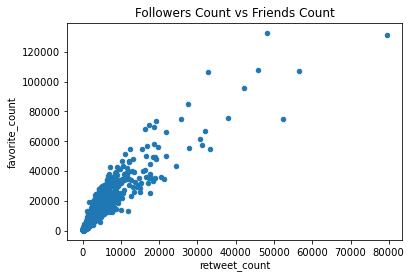

In [158]:
# The Pandas Scatter Plot Function of Followers count vs Favorite count.
twitter.plot(x='retweet_count', y='favorite_count',       
    kind='scatter', title='Followers Count vs Friends Count',   
    xlabel='Friends Count', ylabel='Followers Count');

We can see a positive corellation between the retweet and favorite count.